## 4.2: Iterates

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

In [2]:
# function and gradient
def func(x, beta=1.0):
    return x[0] ** 2 + beta * x[0] * x[1] + x[1] ** 2


def grad_func(x, beta=1.0):
    return jax.grad(func)(x, beta)

In [3]:
x_range = np.linspace(-1.5, 2, 100)
y_range = np.linspace(-1.5, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[func(jnp.array([x, y]), beta=1.0) for x in x_range] for y in y_range])

# initial point
initial_point = jnp.array([1.0, 1.0])
betas = [1]
alphas = [1 / 2, 2 / 3, 1]
iterations = 3

In [4]:
def plot_iterations(initial_point, beta, alpha, iterations):
    x = initial_point
    fig, ax = plt.subplots(figsize=(8, 6))
    CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.plot(x[0], x[1], "or", markersize=4)
    ax.text(x[0] + 0.1, x[1] + 0.1, r"$x^0$")

    for k in range(iterations):
        # Compute gradient and next point
        grad_x = grad_func(x, beta)
        next_x = x - alpha * grad_x
        grad_norm = jnp.linalg.norm(grad_func(next_x, beta))
        print(f"Iteration #{k+1}: x = {next_x}, L2 gradient norm = {grad_norm:.4f}")

        # Plot arrow
        arrow = FancyArrowPatch(
            (x[0], x[1]),
            (next_x[0], next_x[1]),
            arrowstyle="simple",
            color="k",
            mutation_scale=10,
        )
        ax.add_patch(arrow)

        ax.plot(next_x[0], next_x[1], "or", markersize=4)
        ax.text(next_x[0] + 0.1, next_x[1] + 0.1, f"$x^{k+1}$")

        x = next_x

    # Set plot details
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(f"Gradient Descent Iterations (beta={beta}, alpha={alpha:.2f})")
    plt.grid()
    plt.show()

Iteration #1: x = [-0.5 -0.5], L2 gradient norm = 2.1213
Iteration #2: x = [0.25 0.25], L2 gradient norm = 1.0607
Iteration #3: x = [-0.125 -0.125], L2 gradient norm = 0.5303


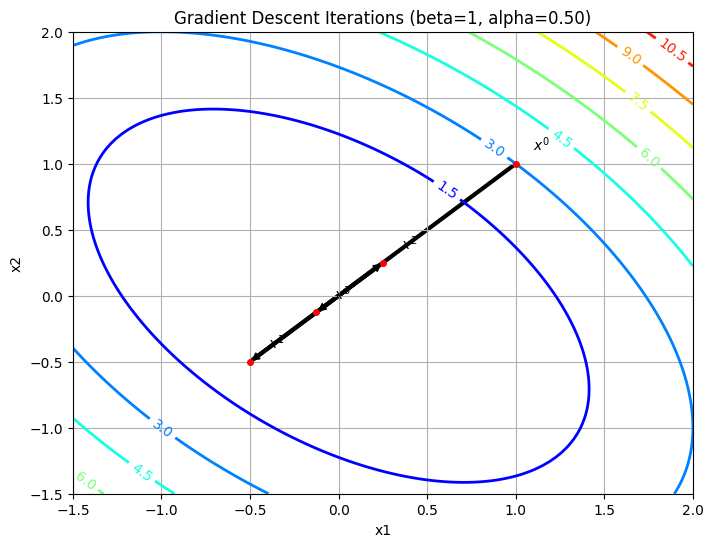

Iteration #1: x = [-1. -1.], L2 gradient norm = 4.2426
Iteration #2: x = [1. 1.], L2 gradient norm = 4.2426
Iteration #3: x = [-1. -1.], L2 gradient norm = 4.2426


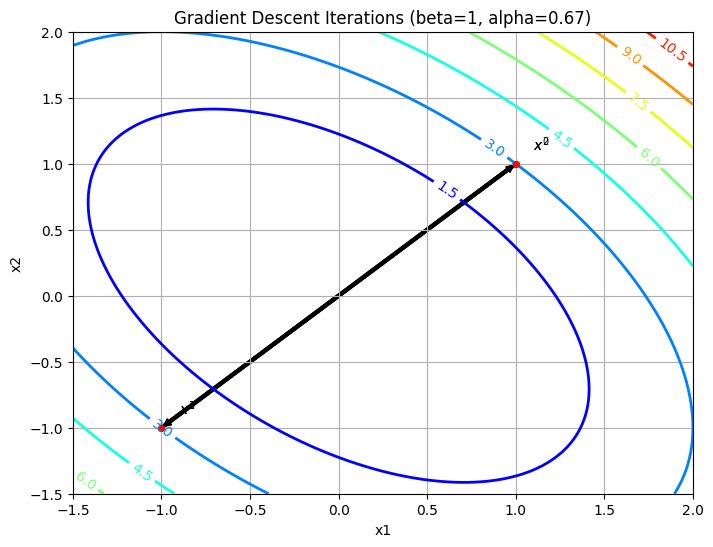

Iteration #1: x = [-2. -2.], L2 gradient norm = 8.4853
Iteration #2: x = [4. 4.], L2 gradient norm = 16.9706
Iteration #3: x = [-8. -8.], L2 gradient norm = 33.9411


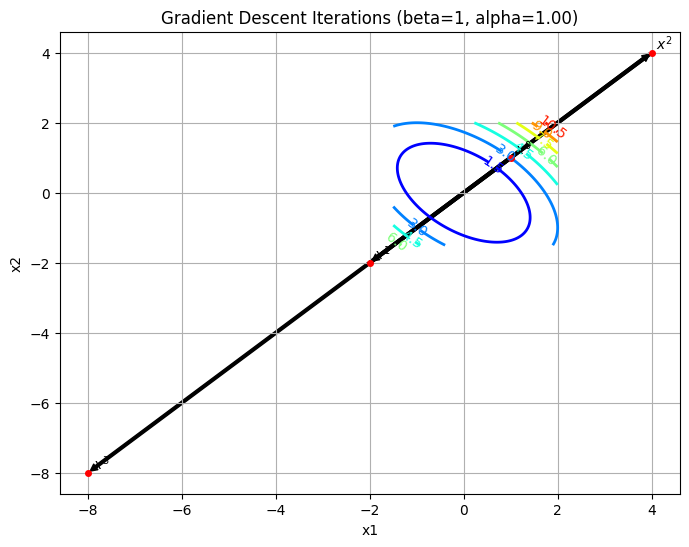

In [5]:
for beta in betas:
    for alpha in alphas:
        plot_iterations(initial_point, beta, alpha, iterations)

We can see that case 1 converges the fastest as the gradient norm decreases the fastest.